## Calcul scientifique et visualisation de données

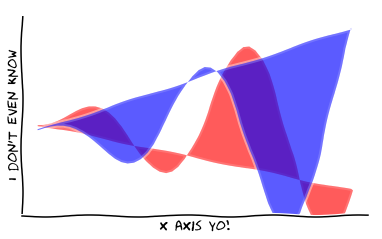

### Numpy

<img src="img/numpy_logo.png" />

**Numpy** va permettre de créer et manipuler des tableaux typés de *n* dimensions de manière performante.

Les bibliothèques utilisées par la suite se basent sur des objets de ce type (les colonnes de valeurs dans **pandas**, valeurs de chaque cellule d'un raster avec **rasterio**, etc.) ou prennent ces objets en entrées (**scikit-learn**, etc.).

In [1]:
import numpy as np

arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

In [2]:
# Application de l'opération à l'ensemble
# du tableau
arr + 2

array([3, 4, 5, 6])

In [3]:
#### On peut ainsi définir des tableaux plus complexes :
arr = np.array([
    [12.1, -23.9],
    [3.91, -20.1],
    [2.12, -7.93],
])
arr

array([[ 12.1 , -23.9 ],
       [  3.91, -20.1 ],
       [  2.12,  -7.93]])

#### Connaitre la taille du tableau :

In [4]:
arr.size # Nombre d'éléments

6

In [5]:
arr.shape # Dimensions : (3 lignes, 2 colonnes)

(3, 2)

#### Appliquer une opération à l'ensemble du tableau :

In [6]:
arr2 = arr * 3.1
arr2

array([[ 37.51 , -74.09 ],
       [ 12.121, -62.31 ],
       [  6.572, -24.583]])

#### Transposé :

In [7]:
arr2.T

array([[ 37.51 ,  12.121,   6.572],
       [-74.09 , -62.31 , -24.583]])

In [8]:
arr2.transpose()

array([[ 37.51 ,  12.121,   6.572],
       [-74.09 , -62.31 , -24.583]])

#### Produit terme à terme :

In [9]:
arr * arr2

array([[ 453.871  , 1770.751  ],
       [  47.39311, 1252.431  ],
       [  13.93264,  194.94319]])

#### Produit matriciel :

In [10]:
arr.dot(arr2.T)

array([[2224.622  , 1635.8731 ,  667.0549 ],
       [1635.8731 , 1299.82411,  519.81482],
       [ 667.0549 ,  519.81482,  208.87583]])

#### Découpage (*slicing*) :

In [11]:
arr[:,1]

array([-23.9 , -20.1 ,  -7.93])

#### Sélection d'éléments :

In [12]:
arr[arr > 0]

array([12.1 ,  3.91,  2.12])

#### Modification de la forme du tableau :

In [13]:
arr.reshape(6, 1)

array([[ 12.1 ],
       [-23.9 ],
       [  3.91],
       [-20.1 ],
       [  2.12],
       [ -7.93]])

In [14]:
arr.reshape(1, 6)

array([[ 12.1 , -23.9 ,   3.91, -20.1 ,   2.12,  -7.93]])

In [15]:
# Division de tous les éléments de la
# deuxième colonne (-> index 1) par 3
arr[:,1] /= 3
arr

array([[12.1       , -7.96666667],
       [ 3.91      , -6.7       ],
       [ 2.12      , -2.64333333]])

#### Création de tableaux "spécifiques" :

In [16]:
np.zeros((4, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [17]:
np.ones(3)

array([1., 1., 1.])

In [18]:
# Éléments régulièrement espacés
np.linspace(1., 4., 6) # Premier, dernier, nombre d'éléments

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

In [19]:
np.random.uniform(0, 1, 100) # 100 valeurs entre 0 et 1

array([0.70033452, 0.37323258, 0.30457816, 0.89517739, 0.49368348,
       0.66629952, 0.00532499, 0.03592179, 0.27343153, 0.34342842,
       0.32278472, 0.31684983, 0.01157586, 0.30594017, 0.14175573,
       0.73940055, 0.98393337, 0.55085479, 0.81612485, 0.36770632,
       0.47503789, 0.13275072, 0.16804681, 0.74839374, 0.92052602,
       0.85406743, 0.60323953, 0.79057747, 0.79392021, 0.71436542,
       0.08504263, 0.37295468, 0.26227163, 0.17007402, 0.00835505,
       0.10059159, 0.31228431, 0.85333909, 0.21941645, 0.97149878,
       0.51257748, 0.35464863, 0.26018628, 0.8357394 , 0.92530692,
       0.4331179 , 0.48459518, 0.28786897, 0.06555665, 0.85024552,
       0.28941492, 0.94675241, 0.65902255, 0.79431291, 0.0981484 ,
       0.07283913, 0.86172499, 0.09264166, 0.90451018, 0.91885169,
       0.5433306 , 0.4652768 , 0.50852447, 0.65844165, 0.47737303,
       0.69944201, 0.49530553, 0.84278798, 0.91406133, 0.88652499,
       0.53702082, 0.55615617, 0.30198504, 0.68389455, 0.94947

#### Un histogramme pour visualiser ces valeurs ?

### Matplotlib

<img src="img/matplotlib_logo.png" />

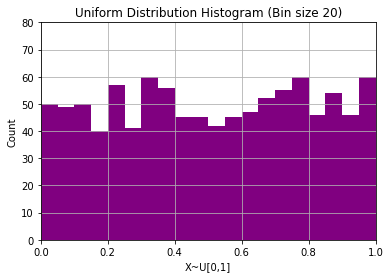

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

data = np.random.uniform(0, 1, 1000)

plt.hist(data, 20, facecolor='purple') 
plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 20)")
plt.axis([0, 1, 0, 80])
plt.grid(True)
plt.show()

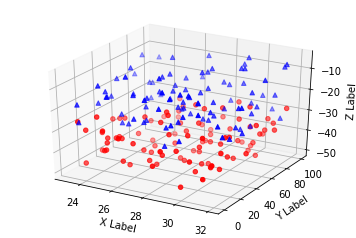

In [21]:
from mpl_toolkits.mplot3d import Axes3D

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

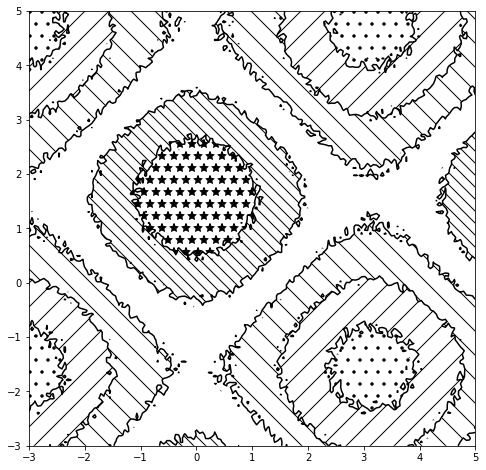

In [22]:
### Des contours ET des motifs ??

x = np.linspace(-3, 5, 150).reshape(1, -1)
y = np.linspace(-3, 5, 120).reshape(-1, 1)
z = np.cos(x) + np.sin(y) + np.random.uniform(0, 0.25, 120 * 150).reshape((120, 150))
x, y = x.flatten(), y.flatten()

fig2, ax2 = plt.subplots(figsize=(8,8))
n_levels = 6
ax2.contour(x, y, z, n_levels, colors='black', linestyles='-')
cs = ax2.contourf(x, y, z, n_levels, colors='none',
                  hatches=['.', '/', '\\', None, '\\\\', '*'],
                  extend='lower')
# ax2.legend(*cs.legend_elements(), handleheight=2)
plt.show()

Sans rentrer dans les détails de l'API de matplotlib :
- API riche, documentation complète, nombreux examples, personnalisable, etc.
- les différentes visualisations de cette présentation (graphiques avec pandas et seaborn, "cartes" avec geopandas) utilisent **matplotlib** quand ce n'est pas spécifié.
- d'autres solutions existent (notamment [**Bokeh**](https://bokeh.pydata.org/) et [**Plot.ly**](https://plot.ly/python/) avec sa syntaxe déclarative et sa possibilité de faire facilement des graphiques interactifs).

### Le même histogramme que précédemment avec **Bokeh** ?

In [23]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()

Loading BokehJS ...

In [24]:
# On génère les données, et les dimensions des 20 boites (bins) :
data = np.random.uniform(0, 1, 1000)
hhist, hedges = np.histogram(data, bins=20)

# Création d'une figure en choisissant les dimensions des axes 
ph = figure(toolbar_location=None,x_range=(0, 1), y_range=(0, 100), plot_height=300)

# Personnalitation rapide
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4

# Ajout des rectangles
ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="purple", line_color="white")

show(ph)

### Interagir avec R / Embarquer R dans un code Python

- Fonctionnalité fournie par [**RPy2**](https://rpy2.readthedocs.io) : https://rpy2.readthedocs.io

- Disponible dans les *notebook Jupyter* avec une commande spéciale **IPython** `%%R`

In [25]:
%load_ext rpy2.ipython

In [26]:
%%R
mean(runif(100))

[1] 0.5079173


In [27]:
%%R
a = runif(100)

In [28]:
# Attention, les variables affectée de cette manière
# ne sont pas (automatiquement) disponibles dans le scope
# des cellules Python
a

NameError: name 'a' is not defined

**On peut toutefois convertir explicitement certains objets Python pour les utiliser directement dans ces cellules R et spécifier quelles variables R doivent être exportées vers Python à la fin de l'éxécution de la cellule :**

In [29]:
# Créons deux tableaux NumPy :
x = np.array([1, 2, 4, 6, 5, 8])
y = np.array([0, 1, 3, 2, 5, 7])

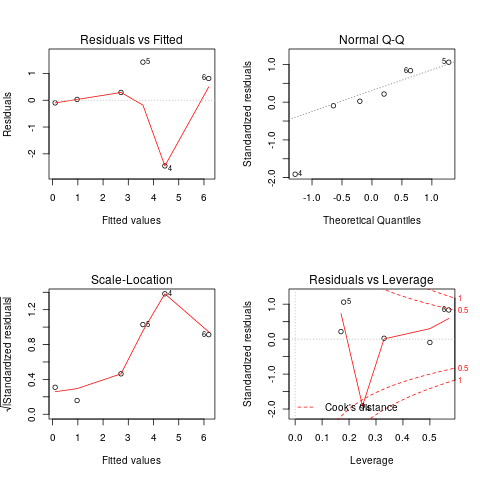

In [30]:
%%R -i x,y -o my_coef
#   ^^ avec -i et le(s) nom(s) de variable(s) Python à utiliser en R
#          ^^ avec -o et pour la sortie R vers Python
xylm = lm(y~x)
my_coef = coef(xylm)
par(mfrow=c(2,2))
plot(xylm)

In [31]:
# La variable my_coef est bien accessible en Python :
my_coef

array([-0.77,  0.87])

- Permet une réelle intégration de __R__ dans **Python** (création d'une application web en Python qui exposerait une console R, etc.), en utilisant les différents modules de **rpy2** on va pouvoir utiliser les différentes fonctionnalitées de R et des packages qu'on va importer avec une granularité très fine.

_**Exemple d'utilisation des fonctionnalitées de R, entièrement en Python**_

Le code R natif qu'on veut mobiliser est le suivant : 

```R
ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)
trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)
group <- gl(2, 10, 20, labels = c("Ctl","Trt"))
weight <- c(ctl, trt)

anova(lm.D9 <- lm(weight ~ group))

summary(lm.D90 <- lm(weight ~ group - 1))# omitting intercept
```

Utilisation du module *rpy2.robjects* qui permet d'appeler les différentes fonctionnalités R :

In [35]:
import rpy2.robjects as robjects
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr
stats = importr('stats')
base = importr('base')

ctl = FloatVector([4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14])
trt = FloatVector([4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69])
group = base.gl(2, 10, 20, labels = ["Ctl","Trt"])
weight = ctl + trt

# Pour les utiliser dans une formule,
# on doit explicitement mettre les variables
# approprié dans l'environnement global de R
robjects.globalenv["weight"] = weight
robjects.globalenv["group"] = group
lm_D9 = stats.lm("weight ~ group")
print(stats.anova(lm_D9))

lm_D90 = stats.lm("weight ~ group - 1") # omitting intercept
print(base.summary(lm_D90))

Analysis of Variance Table

Response: weight
          Df Sum Sq Mean Sq F value Pr(>F)
group      1 0.6882 0.68820  1.4191  0.249
Residuals 18 8.7293 0.48496               


Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!i

### Partie suivante ...

#### 4. [Préparation et analyse de données (lignes/colonnes) et lien avec R](Pydata.slides.html)